In [4]:
import xarray as xr

ds = xr.open_dataset(r"C:\my_draws\all_draw\4.11\cmems_mod_glo_phy_my_0.083deg_P1D-m_1712904851911.nc")
ds = ds.sel(time='2020-09-14')
ds

<xarray.Dataset> Size: 75MB
Dimensions:    (depth: 49, latitude: 301, longitude: 636)
Coordinates:
  * depth      (depth) float32 196B 0.494 1.541 2.646 ... 4.833e+03 5.275e+03
  * latitude   (latitude) float32 1kB -5.0 -4.917 -4.833 ... 19.83 19.92 20.0
  * longitude  (longitude) float32 3kB 117.0 117.1 117.2 ... 169.8 169.8 169.9
    time       datetime64[ns] 8B 2020-09-14
Data variables:
    so         (depth, latitude, longitude) float32 38MB ...
    thetao     (depth, latitude, longitude) float32 38MB ...
Attributes:
    Conventions:       CF-1.11
    title:             daily mean fields from Global Ocean Physics Analysis a...
    institution:       MERCATOR OCEAN
    source:            MERCATOR GLORYS12V1
    history:           2023/06/01 16:20:05 MERCATOR OCEAN Netcdf creation
    references:        http://www.mercator-ocean.fr
    comment:           CMEMS product
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  GLOBAL_MULTIYEAR_PHY_001_030
    subset:datasetId:  cmems_mod_glo_phy_my_0.083deg_P1D-m_202311
    subset:date:       2024-04-12T06:54:11.918Z

[1500 1501 1502 ... 4997 4998 4999]


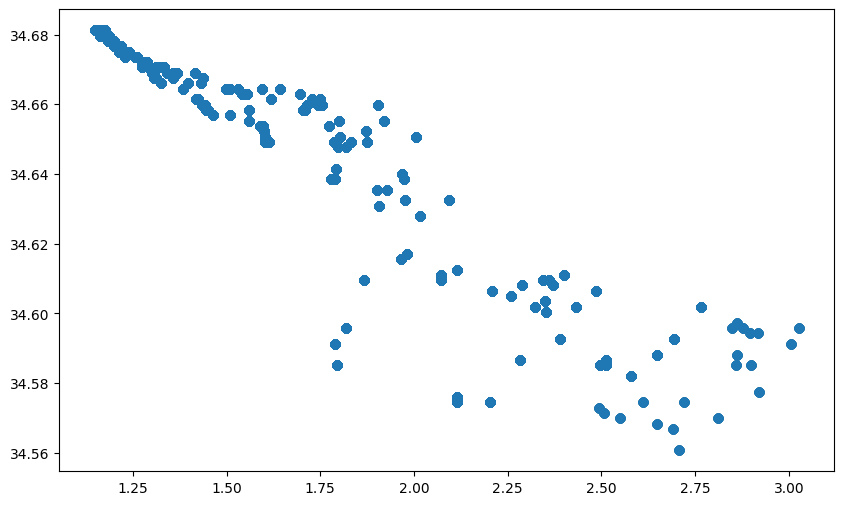

In [9]:
import numpy as np
import matplotlib.pyplot as plt

ds.sel(depth = np.arange(1500, 5000), method="nearest")
selected_data = ds.sel(longitude=130, method='nearest')
latitudes = np.arange(8, 18, 0.5)
selected_temp = selected_data['thetao'].sel(latitude=latitudes,depth = np.arange(1500, 5000), method='nearest')
selected_salinity = selected_data['so'].sel(latitude=latitudes,depth = np.arange(1500, 5000), method='nearest')

fig ,ax = plt.subplots(figsize=(10, 6))
ax.scatter(selected_temp, selected_salinity)

plt.show()

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import gsw

selected_data = ds.sel(longitude=130, method='nearest')

# 现在使用纬度切片选择北纬8到18°，步长为0.5°
latitudes = np.arange(8, 18, 0.5)
selected_temp = selected_data['thetao'].sel(latitude=latitudes, method='nearest')
selected_salinity = selected_data['so'].sel(latitude=latitudes, method='nearest')
pressure = selected_data['depth'].isel(depth=0).values

# 计算位温
absolute_salinity = gsw.SA_from_SP(selected_salinity, pressure, selected_data.longitude, selected_data.latitude)
conservative_temperature = gsw.CT_from_t(absolute_salinity, selected_temp, pressure)
potential_temperature = gsw.pt_from_CT(absolute_salinity, conservative_temperature)

# 创建散点图
plt.figure(figsize=(10, 6))
plt.scatter(potential_temperature, absolute_salinity)
plt.xlabel('Temperature (°C)')
plt.ylabel('Salinity (psu)')
plt.title('Scatter plot of Temperature vs. Salinity at Longitude 130°')


plt.show()


In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import gsw

# 选择指定经度的数据
selected_data = ds.sel(longitude=130, method='nearest')

# 使用纬度切片选择北纬8到18°，步长为0.5°
latitudes = np.arange(8, 18, 0.5)
potential_temperatures = []
salinities = []

for lat in latitudes:
    # 选择对应纬度的温度和盐度
    temp_data = selected_data['thetao'].sel(latitude=lat, method='nearest')
    salt_data = selected_data['so'].sel(latitude=lat, method='nearest')
    
    # 对每个深度计算位温
    for d in range(len(temp_data.depth)):
        temp = temp_data.isel(depth=d).values
        salinity = salt_data.isel(depth=d).values
        depth = temp_data.depth.isel(depth=d).values

        # 计算压力（假设深度单位为米，直接当作dbar使用）
        pressure = depth

        # 计算位温
        abs_salinity = gsw.SA_from_SP(salinity, pressure, selected_data.longitude, lat)
        cons_temp = gsw.CT_from_t(abs_salinity, temp, pressure)
        pot_temp = gsw.pt_from_CT(abs_salinity, cons_temp)
        
        potential_temperatures.append(pot_temp)
        salinities.append(abs_salinity)

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(potential_temperatures, salinities)
plt.xlabel('Potential Temperature (°C)')
plt.ylabel('Absolute Salinity (psu)')
plt.title('Scatter plot of Potential Temperature vs. Absolute Salinity at Longitude 130°')
plt.show()
